# Test 5 - Execution times

In [ ]:
! tar czf Testing.tar *

In [ ]:
! nvidia-smi

In [1]:
import pickle
import random
import math

# Instance variables

In [2]:
levels = {"coin_collector": 17, "cooking": 9, "treasure_hunter": 29}
seeds = range(1,11)
n_think_indices = [0, 10, "r5"]
n_episodes = 1
max_steps = 100

# Data aggregation for visualization

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bootstrap

In [40]:
time_coin_nothink = []
time_coin_nothink_ci = []
time_coin_10think = []
time_coin_10think_ci = []
time_coin_r5think = []
time_coin_r5think_ci = []
time_treasure_nothink = []
time_treasure_nothink_ci = []
time_treasure_10think = []
time_treasure_10think_ci = []
time_treasure_r5think = []
time_treasure_r5think_ci = []
time_cooking_nothink = []
time_cooking_nothink_ci = []
time_cooking_10think = []
time_cooking_10think_ci = []
time_cooking_r5think = []
time_cooking_r5think_ci = []

final_arrays = {"coin_collector": {0: (time_coin_nothink, time_coin_nothink_ci), 10: (time_coin_10think, time_coin_10think_ci), "r5": (time_coin_r5think, time_coin_r5think_ci)},
                "treasure_hunter": {0: (time_treasure_nothink, time_treasure_nothink_ci), 10: (time_treasure_10think, time_treasure_10think_ci), "r5": (time_treasure_r5think, time_treasure_r5think_ci)},
                "cooking": {0: (time_cooking_nothink, time_cooking_nothink_ci), 10: (time_cooking_10think, time_cooking_10think_ci), "r5": (time_cooking_r5think, time_cooking_r5think_ci)}}

for n in n_think_indices:
    for game in levels.keys():
        for level in range(1, levels[game]+1):
            results_all_seeds = []
            try:
                with open(f"./Testing 4/{n}think_{game}_level{level}.pickle", "rb") as f:
                    results_all_seeds = pickle.load(f)
                    f.close()
                #final_times = [run[-1][2] for run in results_all_seeds] # last step, time
                final_times = [run[-1][2]/run[-1][0] for run in results_all_seeds] # last step, time, normalized by amount of steps

                avg_final_time = np.mean(final_times)
                bootstrap_results = bootstrap(data=(final_times,), 
                                    statistic=np.mean,
                                    method="basic",
                                    n_resamples=1000,
                                    confidence_level=0.9)
                final_arrays[game][n][0].append(avg_final_time)
                final_arrays[game][n][1].append((bootstrap_results.confidence_interval.high, bootstrap_results.confidence_interval.low))
            except: # we'll skip if we don't have that data
                continue

# Visualization

In [30]:
figsize=(12,20)

In [31]:
ylims = {"coin_collector": (0,1),
         "cooking": (0, 0.5),
         "treasure_hunter": (0.1, 1)}

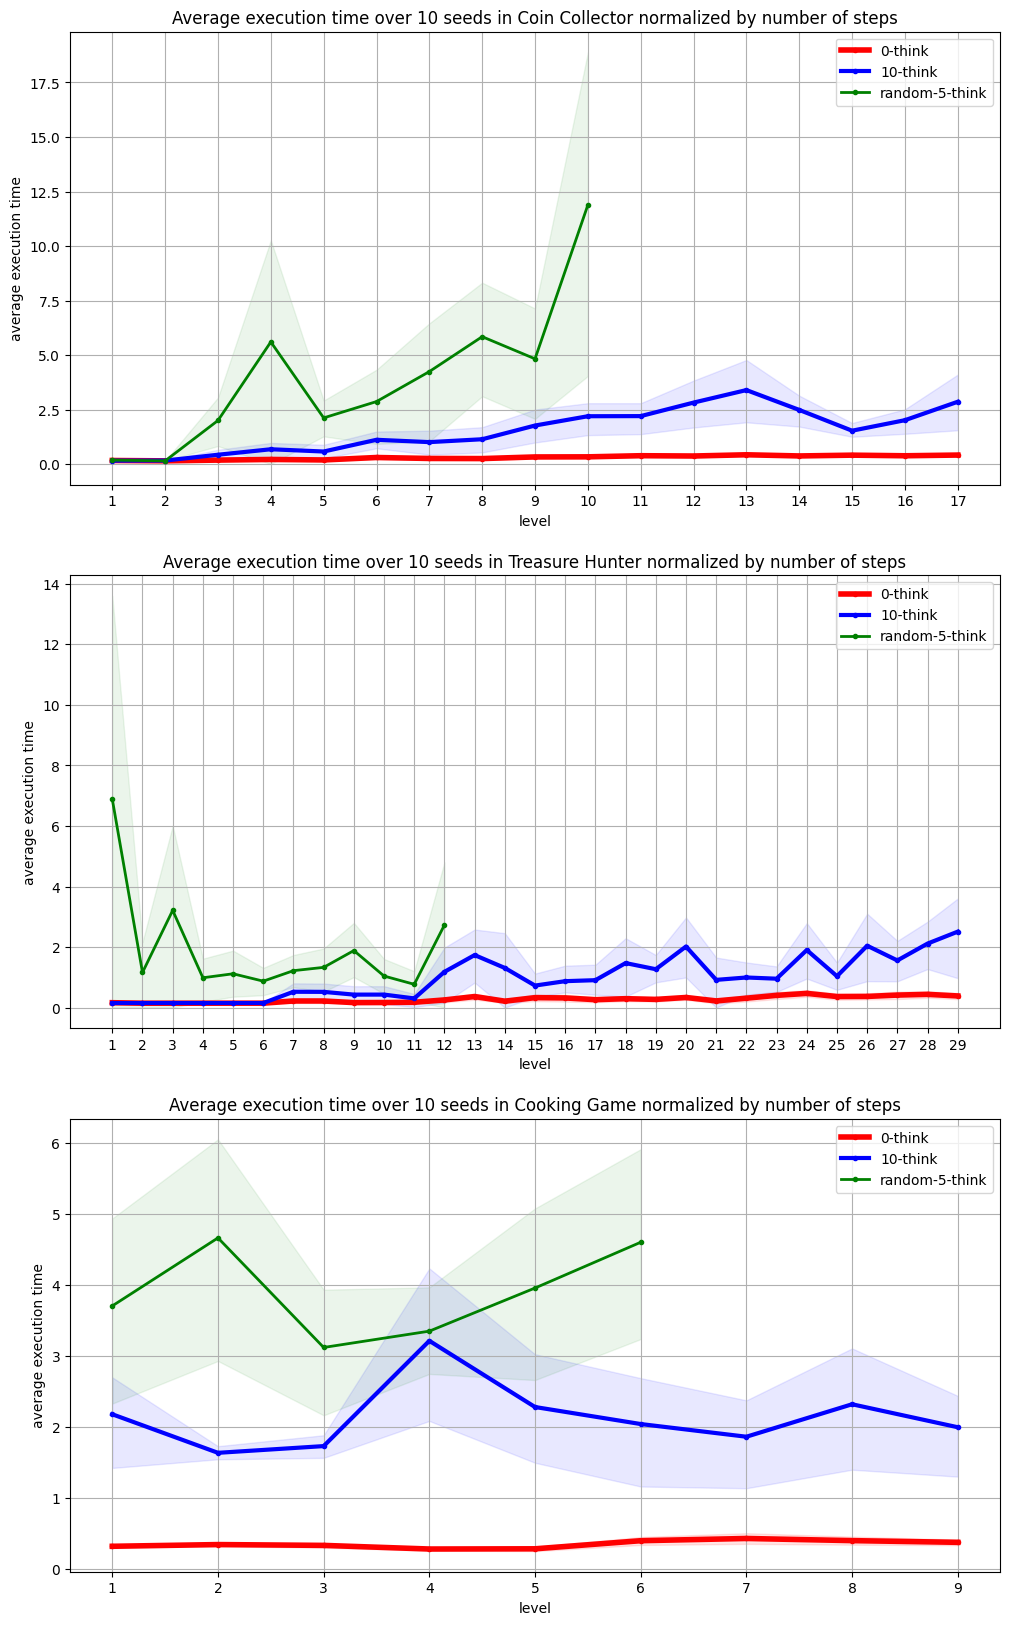

In [42]:
fig, axes = plt.subplots(3,1, figsize=figsize)
prettified_names = {"coin_collector": "Coin Collector", "treasure_hunter": "Treasure Hunter", "cooking": "Cooking Game"}

for i, game in enumerate(final_arrays.keys()):
    ax = axes[i]
    x = list(range(1, levels[game]+1))
    y_0, y_0_ci = final_arrays[game][0]
    y_10, y_10_ci = final_arrays[game][10]
    y_r5, y_r5_ci = final_arrays[game]["r5"]


    ax.fill_between(x,
                    np.clip([i[0] for i in y_0_ci], 0, a_max=None),
                    np.clip([i[1] for i in y_0_ci], 0, a_max=None),
                    alpha=0.1, color="red")
    ax.fill_between(x,
                    np.clip([i[0] for i in y_10_ci], 0, a_max=None),
                    np.clip([i[1] for i in y_10_ci], 0, a_max=None),
                    alpha=0.09, color="blue")
    ax.fill_between(x[:len(y_r5_ci)],
                    np.clip([i[0] for i in y_r5_ci], 0, a_max=None),
                    np.clip([i[1] for i in y_r5_ci], 0, a_max=None),
                    alpha=0.08, color="green")

    ax.plot(x, y_0, label="0-think", marker=".", linestyle="-", color="red", linewidth=4)
    ax.plot(x, y_10, label="10-think", marker=".", linestyle="-", color="blue", linewidth=3)
    ax.plot(x[:len(y_r5)], y_r5, label="random-5-think", marker=".", linestyle="-", color="green", linewidth=2)
    
    ax.set_title(f"Average execution time over 10 seeds in {prettified_names[game]} normalized by number of steps")
    ax.set_xlabel('level')
    ax.set_ylabel('average execution time')
    ax.legend()

    ax.set_xticks(x)
    # ax.set_ylim(ylims[game][0], ylims[game][1])
    ax.grid()

plt.show()